## Classification Problem: Parkinson’s Disease Prediction
The goal of this project is to develop a classification model that predicts whether an individual has Parkinson’s disease (label 1) or is healthy (label 0) based on vocal characteristics measured from voice recordings. These features are indicative of the distinct vocal impairments commonly observed in Parkinson’s patients, making this a binary classification problem where the model needs to accurately distinguish between healthy and Parkinson’s cases.



## Parkinson's Disease Prediction Project Lifecycle

### 1. Data Pre-Processing & Cleaning
- **Load and Review Data**: Import data and get an overview of the dataset.
- **Understand Target Variable Distribution**: Analyze the distribution of the target variable (e.g., healthy vs Parkinson's diagnosis).
- **Handle Missing or Outlier Values**: Identify and address any missing data or outliers to ensure consistency and reliability.
- **Data Transformation**: Apply appropriate data scaling or normalization techniques to bring features to similar ranges.

### 2. Exploratory Data Analysis (EDA)
- **Define EDA Goals**: Establish the goals for EDA, focusing on extracting meaningful insights from the dataset.
- **Analyze Voice Frequency Variables**: Analyze voice features like jitter, shimmer, and pitch frequency.
- **Study Amplitude & Noise Variation Metrics**: Explore metrics related to amplitude and noise to understand their distribution and trends.
- **Examine Nonlinear Complexity Measures**: Investigate nonlinear features such as fractal dimension or entropy metrics.
- **Summarize Insights and Identify Potential Predictors**: Record insights from EDA and identify key variables that may play a significant role in prediction.

### 3. Feature Engineering (If Required)
- **Create Interactions or Transform Features**: Create interaction features or transformations to potentially enhance predictive power.
- **Dimensionality Reduction (e.g., PCA)**: Apply dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce redundancy and simplify the feature space.

### 4. Data Splitting
- **Train-Test Split**: Split the data into training and testing datasets (e.g., 80/20 or 70/30 split) to prepare for model training and evaluation.

### 5. Balance Data with Sampling Techniques
- **Apply SMOTE or Other Methods**: If the dataset is imbalanced, use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution.

### 6. Training Machine Learning Model
- **Select Models and Define Evaluation Metrics**: Choose appropriate models (e.g., Logistic Regression, SVM, Random Forest) and metrics (e.g., accuracy, precision, recall) to evaluate model performance.
- **Train Models and Perform Hyperparameter Tuning**: Train selected models and use hyperparameter tuning techniques (e.g., Grid Search, Random Search) to improve their performance.
- **Select Final Model Based on Performance**: Assess all trained models and select the one with the best performance based on defined metrics.

### 7. Feature Importance Analysis (Post-Modeling)
- **Perform Feature Importance Analysis**: Analyze the importance of features for the final model to understand which variables had the most impact on the predictions.
- **Summarize Key Predictor Insights for Interpretability**: Summarize the important features and document key insights to make the model more interpretable for stakeholders.

### End Goal:
An accurate and interpretable model for Parkinson's disease prediction.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv(r'C:\Users\Usman\Desktop\Portofolio\Datasets\parkinson-disease-detection\archive\Parkinsson disease.csv')

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Dataset Overview

### Name
- **Name**: Contains an identifier for each subject and recording.

### Vocal Attributes
- **MDVP:Fo(Hz)**, **MDVP:Fhi(Hz)**, **MDVP:Flo(Hz)**: Measures of the fundamental vocal frequency, capturing average, maximum, and minimum frequency respectively.
- **MDVP:Jitter(%)**, **MDVP:Jitter(Abs)**, **MDVP:RAP**, **MDVP:PPQ**, **Jitter:DDP**: Metrics capturing variations in fundamental frequency (jitter), which indicate stability in vocal pitch, often affected in Parkinson’s disease.
- **MDVP:Shimmer**, **MDVP:Shimmer(dB)**, **Shimmer:APQ3**, **Shimmer:APQ5**, **MDVP:APQ**, **Shimmer:DDA**: Measures of amplitude variation (shimmer), representing voice stability in terms of loudness.
- **NHR**, **HNR**: Ratios capturing noise to tonal components in the voice, which may reflect vocal disorder severity.

### Dynamical Complexity Measures
- **RPDE**, **DFA**: Measures of vocal signal complexity and fractal scaling, linked to vocal stability.
- **Spread1**, **Spread2**, **D2**, **PPE**: Nonlinear vocal metrics capturing deviations in pitch and energy, relevant for Parkinson’s diagnosis.

### Status
- **Status**: Target variable indicating health status (1 = Parkinson’s, 0 = Healthy).


---

## Discussing Attributes & Measures

### Vocal Attributes

#### 1. Fundamental Frequency
- **MDVP:Fo(Hz)**, **MDVP:Fhi(Hz)**, **MDVP:Flo(Hz)**:
  - These features measure the **fundamental frequency (pitch)** of the voice:
    - **MDVP:Fo(Hz)**: This is the **average fundamental frequency** of the voice. The fundamental frequency, often called pitch, is the basic frequency at which the vocal cords vibrate. In healthy individuals, this pitch tends to be more stable, whereas in Parkinson’s patients, there can be noticeable variations.
    - **MDVP:Fhi(Hz)**: This represents the **maximum fundamental frequency** reached during the recording. It gives insight into the **highest pitch** that the subject can achieve.
    - **MDVP:Flo(Hz)**: This represents the **minimum fundamental frequency** during the recording, indicating the **lowest pitch** that the subject is capable of.
  - **Lower variability** in frequency is typically **better**, as **higher variability** might indicate vocal instability, a common symptom in Parkinson’s patients.

#### 2. Jitter Metrics (Frequency Variation)
- **MDVP:Jitter(%)**, **MDVP:Jitter(Abs)**, **MDVP:RAP**, **MDVP:PPQ**, **Jitter:DDP**:
  - These metrics measure **variations in the fundamental frequency** of the voice, which is referred to as **jitter**:
    - **Jitter** represents the **cycle-to-cycle variability** in pitch during sustained phonation. It measures the consistency of the vocal cord vibrations.
    - **MDVP:Jitter(%)**: Represents the **frequency variation as a percentage**. **Higher values** indicate **inconsistency** in vocal fold vibration, suggesting reduced vocal stability.
    - **MDVP:Jitter(Abs)**: This is the **absolute measure of pitch variation**.
    - **MDVP:RAP** (Relative Average Perturbation): Measures **short-term variability** in pitch, averaged over 3 pitch periods. **Higher RAP** values indicate **greater instability** in pitch.
    - **MDVP:PPQ** (Pitch Period Quotient): Measures **pitch variation** averaged over a longer time frame compared to RAP. Again, **higher values** are a sign of instability.
    - **Jitter:DDP**: A form of jitter calculated based on three consecutive periods. Higher values indicate **more instability** in vocal fold vibrations.
  - Individuals with Parkinson’s often show **increased jitter values**, implying **less stability** in pitch.

#### 3. Shimmer Metrics (Amplitude Variation)
- **MDVP:Shimmer**, **MDVP:Shimmer(dB)**, **Shimmer:APQ3**, **Shimmer:APQ5**, **MDVP:APQ**, **Shimmer:DDA**:
  - These metrics measure **variations in amplitude** (or loudness), which is referred to as **shimmer**:
    - **Shimmer** represents **cycle-to-cycle variability in the loudness** of the voice, reflecting the stability in volume produced by the vocal cords.
    - **MDVP:Shimmer**: Measures **amplitude variation as a percentage**. **Higher values** indicate **less control** over the amplitude.
    - **MDVP:Shimmer(dB)**: Represents the **variation in loudness in decibels**. **Higher values** suggest greater instability.
    - **Shimmer:APQ3** (Amplitude Perturbation Quotient): Measures **average amplitude variability** over 3 periods. **Higher values** indicate instability.
    - **Shimmer:APQ5**: Measures shimmer over **5 periods**, indicating variability over a longer time frame compared to APQ3. **Higher values** suggest worse control.
    - **MDVP:APQ**: Another metric to quantify shimmer over multiple periods.
    - **Shimmer:DDA**: Represents the **average difference between consecutive periods' amplitude**.
  - **Increased shimmer values** indicate **difficulty controlling loudness**, which is often seen in individuals with Parkinson’s, leading to unstable voice volume.

#### 4. Noise to Harmonics Ratio
- **NHR (Noise to Harmonics Ratio)**, **HNR (Harmonics to Noise Ratio)**:
  - **NHR** measures the amount of **noise in the voice compared to the tonal (harmonic) components**:
    - **Higher NHR** values indicate **more noise** relative to the tonal parts, which is considered **worse** for vocal quality. It suggests greater vocal fold irregularities and is often associated with Parkinson’s.
  - **HNR** measures the **ratio of harmonic content to noise**:
    - **Lower HNR** values indicate a **noisier voice**, which implies **worse vocal clarity**. People with Parkinson’s often have lower HNR values, leading to a breathier or hoarse voice.
    - **Higher HNR** values are **better**, as they indicate a clearer, more stable voice.

### Dynamical Complexity Measures

#### 1. Complexity Metrics
- **RPDE (Recurrence Period Density Entropy)**, **DFA (Detrended Fluctuation Analysis)**:
  - These metrics are used to measure the **complexity and scaling properties** of the vocal signal:
    - **RPDE** measures **how predictable the signal is over time**. **Higher RPDE** values indicate greater **unpredictability** or irregularity, which is **worse** for vocal stability.
    - **DFA** provides an indication of **fractal scaling properties** of the voice signal. **Higher DFA** values imply **greater instability** and are usually **worse** for vocal health.

#### 2. Nonlinear Vocal Metrics
- **Spread1**, **Spread2**, **D2**, **PPE (Pitch Period Entropy)**:
  - These metrics capture **nonlinear aspects** of the vocal signal:
    - **Spread1** and **Spread2**: Represent deviations in the **frequency domain**. **Higher values** often indicate **greater instability** or deviation, which is **worse** for vocal health.
    - **D2**: Represents the **dimensionality of the signal**, with **higher values** indicating more complexity and being generally **worse** for vocal stability.
    - **PPE**: Measures the **entropy of pitch periods**. **Higher PPE** values indicate greater irregularity in pitch, which is **worse** for vocal health.

### Status
- **Status**: The target variable that indicates the health status of the subject:
  - **1**: Indicates the presence of Parkinson’s Disease.
  - **0**: Indicates a healthy individual.

---

### Key Points
- For most metrics (**Jitter**, **Shimmer**, **NHR**, **RPDE**, **DFA**, **Spread1**, **Spread2**, **D2**, and **PPE**), **lower values are better** as they indicate stability in vocal features.
- For **HNR**, **higher values are better**, as they represent clearer, more stable vocal quality.
- These features collectively help in identifying the characteristic changes in voice stability, amplitude, and noise, which are commonly impacted by Parkinson's disease.


### 1. Data Pre-Processing & Cleaning

In [6]:
pd.set_option('display.max_columns', None)

data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
pd.reset_option('display.max_columns')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

##### There are no null values in the dataset.

In [10]:
data['status'].unique()

array([1, 0], dtype=int64)

In [11]:
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

### Target Variable Analysis: `status`

The target variable for this classification problem is **`status`**, which represents the presence or absence of Parkinson's disease:
- **1**: Indicates a positive diagnosis of Parkinson's disease.
- **0**: Indicates a negative diagnosis (healthy).

The output of `data['status'].unique()` confirms that this is a **binary classification problem**, with the two possible values being **1** and **0**.

#### Value Counts of `status`
To understand the distribution of the target variable, we examined the value counts:

```
data['status'].value_counts()
```
**Output**:
```
1    147
0     48
Name: status, dtype: int64
```

From the value counts:
- **147 samples** are labeled as **1** (Parkinson's positive).
- **48 samples** are labeled as **0** (Healthy).

This indicates a significant **class imbalance**, where the positive class (Parkinson's) is approximately **three times more frequent** than the negative class (Healthy). This imbalance can lead to bias in the model, making it more inclined to predict the majority class (Parkinson's).

#### Addressing Class Imbalance with SMOTE
Since we cannot simply collect additional data to balance the classes, we will use **SMOTE (Synthetic Minority Over-sampling Technique)** for **oversampling** the minority class (`0`). SMOTE works by generating synthetic examples for the minority class, which helps create a more balanced dataset. This, in turn, can improve the model's performance by reducing bias towards the majority class and ensuring the model learns to recognize both classes effectively.



---

### 2. Exploratory Data Analysis (EDA)

#### 2.1 Analyze voice features  [jitter, shimmer, and pitch frequency]

##### Analyzing Jitter -

In [12]:

df_jitter = data[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']]

df_jitter.head()

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
0,0.00784,0.00007,0.00370,0.00554,0.01109
1,0.00968,0.00008,0.00465,0.00696,0.01394
2,0.01050,0.00009,0.00544,0.00781,0.01633
3,0.00997,0.00009,0.00502,0.00698,0.01505
4,0.01284,0.00011,0.00655,0.00908,0.01966


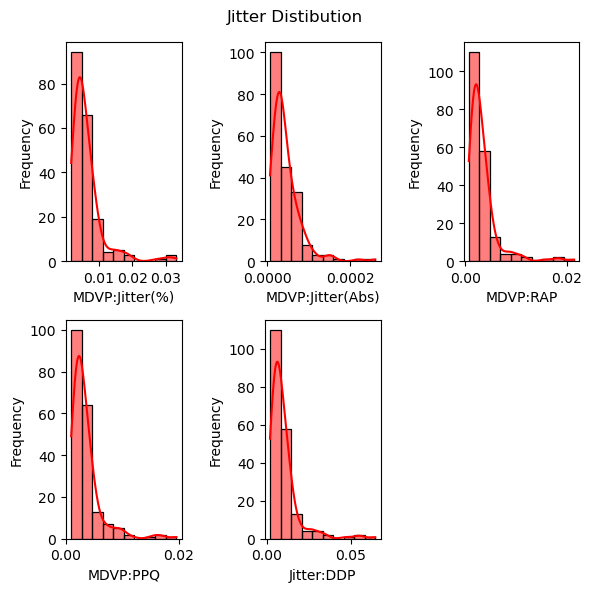

In [33]:
plt.figure(figsize=(6,6))

for index, column in enumerate(df_jitter.columns, start=1):
    plt.subplot(2,3, index)
    sns.histplot(x=df_jitter[column], bins=10, kde=True, color="red")
    plt.ylabel('Frequency')
    plt.xlabel(f'{column}')

plt.suptitle('Jitter Distibution')
plt.tight_layout()
plt.show()

##### Analyzing Shimmer -

In [37]:
df_shimmer = data[['MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']]

df_shimmer.head()

,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
0,0.426,0.02182,0.03130,0.02971,0.06545
1,0.626,0.03134,0.04518,0.04368,0.09403
2,0.482,0.02757,0.03858,0.03590,0.08270
3,0.517,0.02924,0.04005,0.03772,0.08771
4,0.584,0.03490,0.04825,0.04465,0.10470


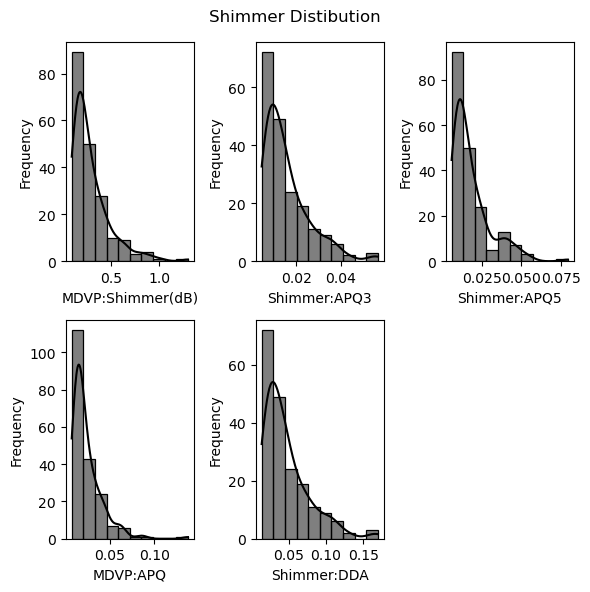

In [50]:
plt.figure(figsize=(6,6))

for index, column in enumerate(df_shimmer.columns, start=1):
    plt.subplot(2,3, index)
    sns.histplot(x=df_shimmer[column], bins=10, kde=True, color="black")
    plt.ylabel('Frequency')
    plt.xlabel(f'{column}')

plt.suptitle('Shimmer Distibution')
plt.tight_layout()
plt.show()

##### Pitch Frequency -

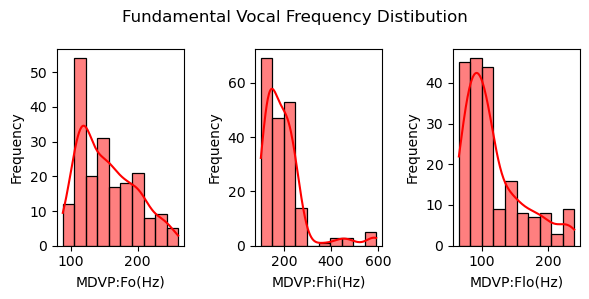

In [48]:
df_fvf = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']]


plt.figure(figsize=(6,3))

for index, column in enumerate(df_fvf.columns, start=1):
    plt.subplot(1,3, index)
    sns.histplot(x=df_fvf[column], bins=10, kde=True, color="red")
    plt.ylabel('Frequency')
    plt.xlabel(f'{column}')

plt.suptitle('Fundamental Vocal Frequency Distibution')
plt.tight_layout()
plt.show()

#### Analysis Findings
##### 1. Jitter, Shimmer, and Fundamental Frequency Distribution
- Most of the **jitter**, **shimmer**, and **fundamental vocal frequency** metrics show **right-skewed** distributions.
- **Right-skewed distribution** suggests that the majority of subjects have **lower values**, while fewer individuals have much **higher values**, creating a long right tail.
- **Higher jitter and shimmer values** in the right tail indicate **vocal instability**, commonly seen in Parkinson's patients.
- The **fundamental frequency** metrics also show right skewness, implying that only a few individuals have unusually **high vocal frequencies**, which could indicate **reduced vocal control**.

##### 2. Differentiating Healthy and Parkinson’s Patients
- The **right-skewed nature** of these distributions suggests that **higher values** for jitter, shimmer, and vocal frequency are more likely to be associated with Parkinson's disease.
- **Lower values** for these metrics typically indicate more stable vocal characteristics, often seen in **healthy** individuals.

#### Suggestions Before Modeling
1. **Feature Scaling**: **normalizing or transforming** these skewed features to reduce the impact of skewness on the model. Techniques like **log transformation** can help reduce the skewness.
2. **SMOTE Application**: Use **SMOTE** to handle the class imbalance in the target variable, ensuring that both classes are well represented during model training.


##### 2.2 Explore metrics related to amplitude and noise to understand their distribution and trends

In [81]:
df_comparison = data[['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)', 'MDVP:Fo(Hz)', 'status']]

df_comparison_healthy = df_comparison.loc[df_comparison['status'] == 0][['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)', 'MDVP:Fo(Hz)']]
df_comparison_unhealthy = df_comparison.loc[df_comparison['status'] == 1][['MDVP:Jitter(%)', 'MDVP:Shimmer(dB)', 'MDVP:Fo(Hz)']]


In [82]:
from IPython.display import HTML

html_healthy = df_comparison_healthy.head().to_html()
html_unhealthy = df_comparison_unhealthy.head().to_html()

html = f"""
<div style="display: flex;">
    <div style="margin-right: 20px;">{html_healthy}</div>
    <div>{html_unhealthy}</div>
</div>
"""

display(HTML(html))


,MDVP:Jitter(%),MDVP:Shimmer(dB),MDVP:Fo(Hz)
30,0.00289,0.097,197.076
31,0.00241,0.089,199.228
32,0.00212,0.111,198.383
33,0.00180,0.085,202.266
34,0.00178,0.085,203.184
,MDVP:Jitter(%),MDVP:Shimmer(dB),MDVP:Fo(Hz)
0,0.00784,0.426,119.992
1,0.00968,0.626,122.400
2,0.01050,0.482,116.682
3,0.00997,0.517,116.676


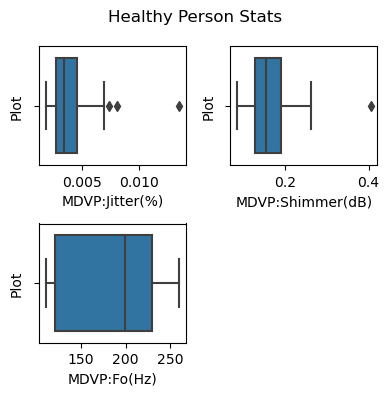

In [83]:
# Instead of the dataframes, let's plot!

plt.figure(figsize=(4,4))

for index, col in enumerate(df_comparison_healthy.columns, start=1):
    plt.subplot(2,2, index)
    sns.boxplot(x=df_comparison_healthy[col])
    plt.xlabel(f'{col}')
    plt.ylabel('Plot')

plt.suptitle('Healthy Person Stats')
plt.tight_layout()
plt.show()
               

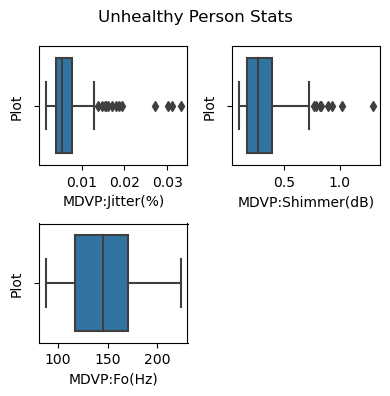

In [84]:
# Instead of the dataframes, let's plot!

plt.figure(figsize=(4,4))

for index, col in enumerate(df_comparison_unhealthy.columns, start=1):
    plt.subplot(2,2, index)
    sns.boxplot(x=df_comparison_unhealthy[col])
    plt.xlabel(f'{col}')
    plt.ylabel('Plot')

plt.suptitle('Unhealthy Person Stats')
plt.tight_layout()
plt.show()
               

#### Key Insights from Boxplot Analysis

#### 1. Higher Jitter and Shimmer Values in Parkinson's
- **Jitter** and **shimmer** values are significantly higher for individuals with Parkinson's, indicating **greater instability** in both **pitch** and **amplitude**.
- This instability is consistent with the **motor control issues** caused by Parkinson's, affecting the **vocal cords**.

#### 2. Increased Outliers in Parkinson's Group
- Both **jitter** and **shimmer** metrics for individuals with Parkinson's show a higher number of **outliers**, reflecting more extreme values.
- This suggests that individuals with Parkinson's may experience more **frequent** and **severe fluctuations** in vocal characteristics.

#### 3. Reduced Pitch Range in Parkinson's
- The **fundamental frequency** (`MDVP:Fo(Hz)`) is **lower** and has a **narrower range** in individuals with Parkinson's compared to healthy individuals.
- This may indicate difficulty in **pitch control**, affecting their ability to produce a **varied range of tones**.



##### 2.3 Investigate nonlinear features such as fractal dimension or entropy metrics.

<i>
Q1) Do individuals with Parkinson’s tend to have higher values for RPDE, DFA, or PPE compared to healthy individuals?
    
Q2) How significant is the difference between healthy and Parkinson's groups in terms of these nonlinear metrics?  
Q3) Which of these features shows the most noticeable difference, and could it be a strong predictor of Parkinson’s disease? </i>

In [91]:
df_comp = data[['RPDE', 'DFA', 'PPE', 'status']]

df_comp.corr()

,RPDE,DFA,PPE,status
RPDE,1.000000,-0.110950,0.545886,0.308567
DFA,-0.110950,1.000000,0.270445,0.231739
PPE,0.545886,0.270445,1.000000,0.531039
status,0.308567,0.231739,0.531039,1.000000


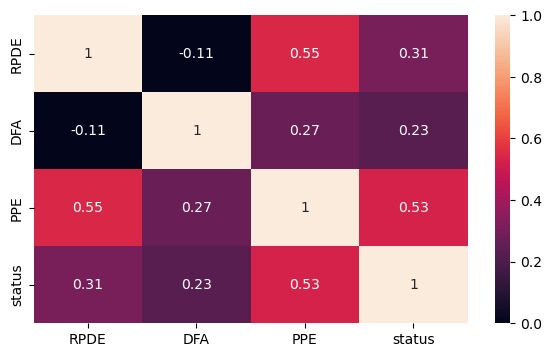

In [92]:
plt.figure(figsize=(7,4))
sns.heatmap(df_corr.corr(), annot=True, vmin=0, vmax=1)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))

for index, col in enumerate(df_comp.columns, start=1):
    
    

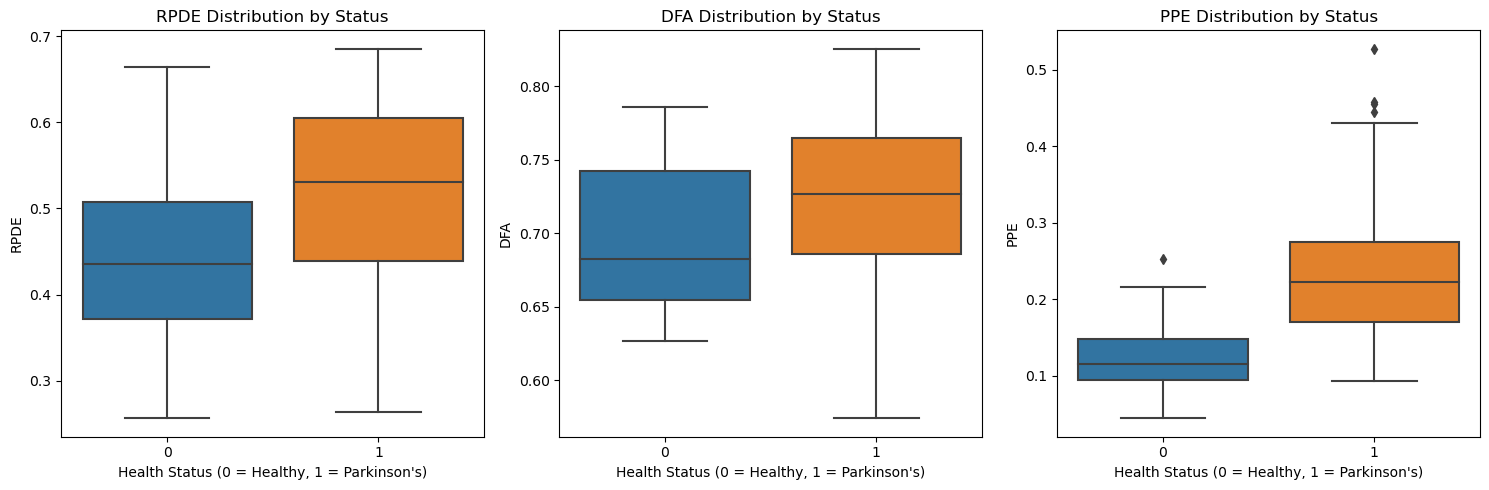

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with an appropriate size
plt.figure(figsize=(15, 5))

# Define the features you want to plot
features = ['RPDE', 'DFA', 'PPE']

# Loop through the features to create a boxplot for each
for index, feature in enumerate(features):
    plt.subplot(1, len(features), index + 1)  # Create subplots in a row
    sns.boxplot(data=data, x='status', y=feature, palette='Set2')
    plt.xlabel('Health Status (0 = Healthy, 1 = Parkinson\'s)')
    plt.title(f'{feature} Distribution by Status')

plt.tight_layout()
plt.show()


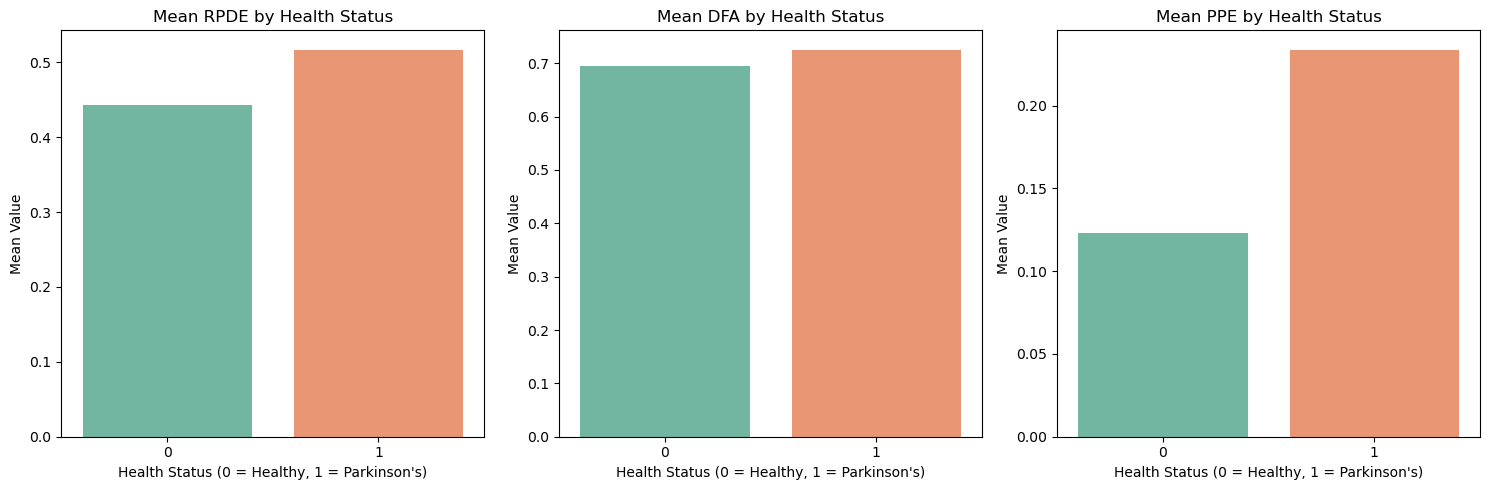

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate mean values for each feature, grouped by the status column
mean_values = data.groupby('status')[['RPDE', 'DFA', 'PPE']].mean().reset_index()

# Set up the figure size
plt.figure(figsize=(15, 5))

# Loop through the features to create a bar chart for each
features = ['RPDE', 'DFA', 'PPE']
for index, feature in enumerate(features):
    plt.subplot(1, len(features), index + 1)
    sns.barplot(data=mean_values, x='status', y=feature, palette='Set2')
    plt.xlabel('Health Status (0 = Healthy, 1 = Parkinson\'s)')
    plt.ylabel('Mean Value')
    plt.title(f'Mean {feature} by Health Status')

plt.tight_layout()
plt.show()


### Key Insights from Nonlinear Complexity Analysis

#### 1. Correlation Heatmap Insights
- The **correlation heatmap** shows a positive correlation between `PPE` and `RPDE` (0.55), suggesting some shared variability or similar behavior between these metrics.
- `DFA` shows a lower correlation with `status` (0.23), suggesting it might be less influential for classification compared to `RPDE` and `PPE`.

#### 2. Boxplot Analysis by Health Status
- The **boxplots** reveal that individuals with Parkinson's tend to have higher values for `RPDE`, `DFA`, and `PPE` compared to healthy individuals.
  - **RPDE**: Median values for Parkinson's individuals are higher than healthy individuals, indicating more variability in signal recurrence, which aligns with the disease's effects on vocal stability.
  - **DFA**: The median for Parkinson's individuals is slightly higher, suggesting a higher degree of signal complexity or long-term correlations.
  - **PPE**: There is a clear difference in **PPE** values, with Parkinson's individuals showing significantly higher values, indicating less pitch stability.
- The **spread** of the data (interquartile range) is greater for Parkinson's individuals in all three metrics, and the presence of **outliers** in `PPE` further emphasizes the vocal instability experienced by Parkinson's patients.

#### 3. Bar Chart Analysis (Mean Values by Health Status)
- The **bar charts** for `RPDE`, `DFA`, and `PPE` indicate that the **mean values** for Parkinson's individuals are consistently higher than for healthy individuals.
  - **RPDE**: Parkinson's patients have a higher mean value, which could imply greater difficulty in maintaining vocal consistency.
  - **DFA**: The mean values are very close between both groups, indicating that this feature alone might not be as discriminative.
  - **PPE**: The mean **PPE** value is notably higher for Parkinson's individuals, reinforcing its importance in distinguishing between healthy and affected individuals.

### 3. Feature Engineering

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [108]:
df_logt = data.copy()

df_logt.drop(['status', 'name'], axis=1, inplace=True)

In [109]:
df_logt.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


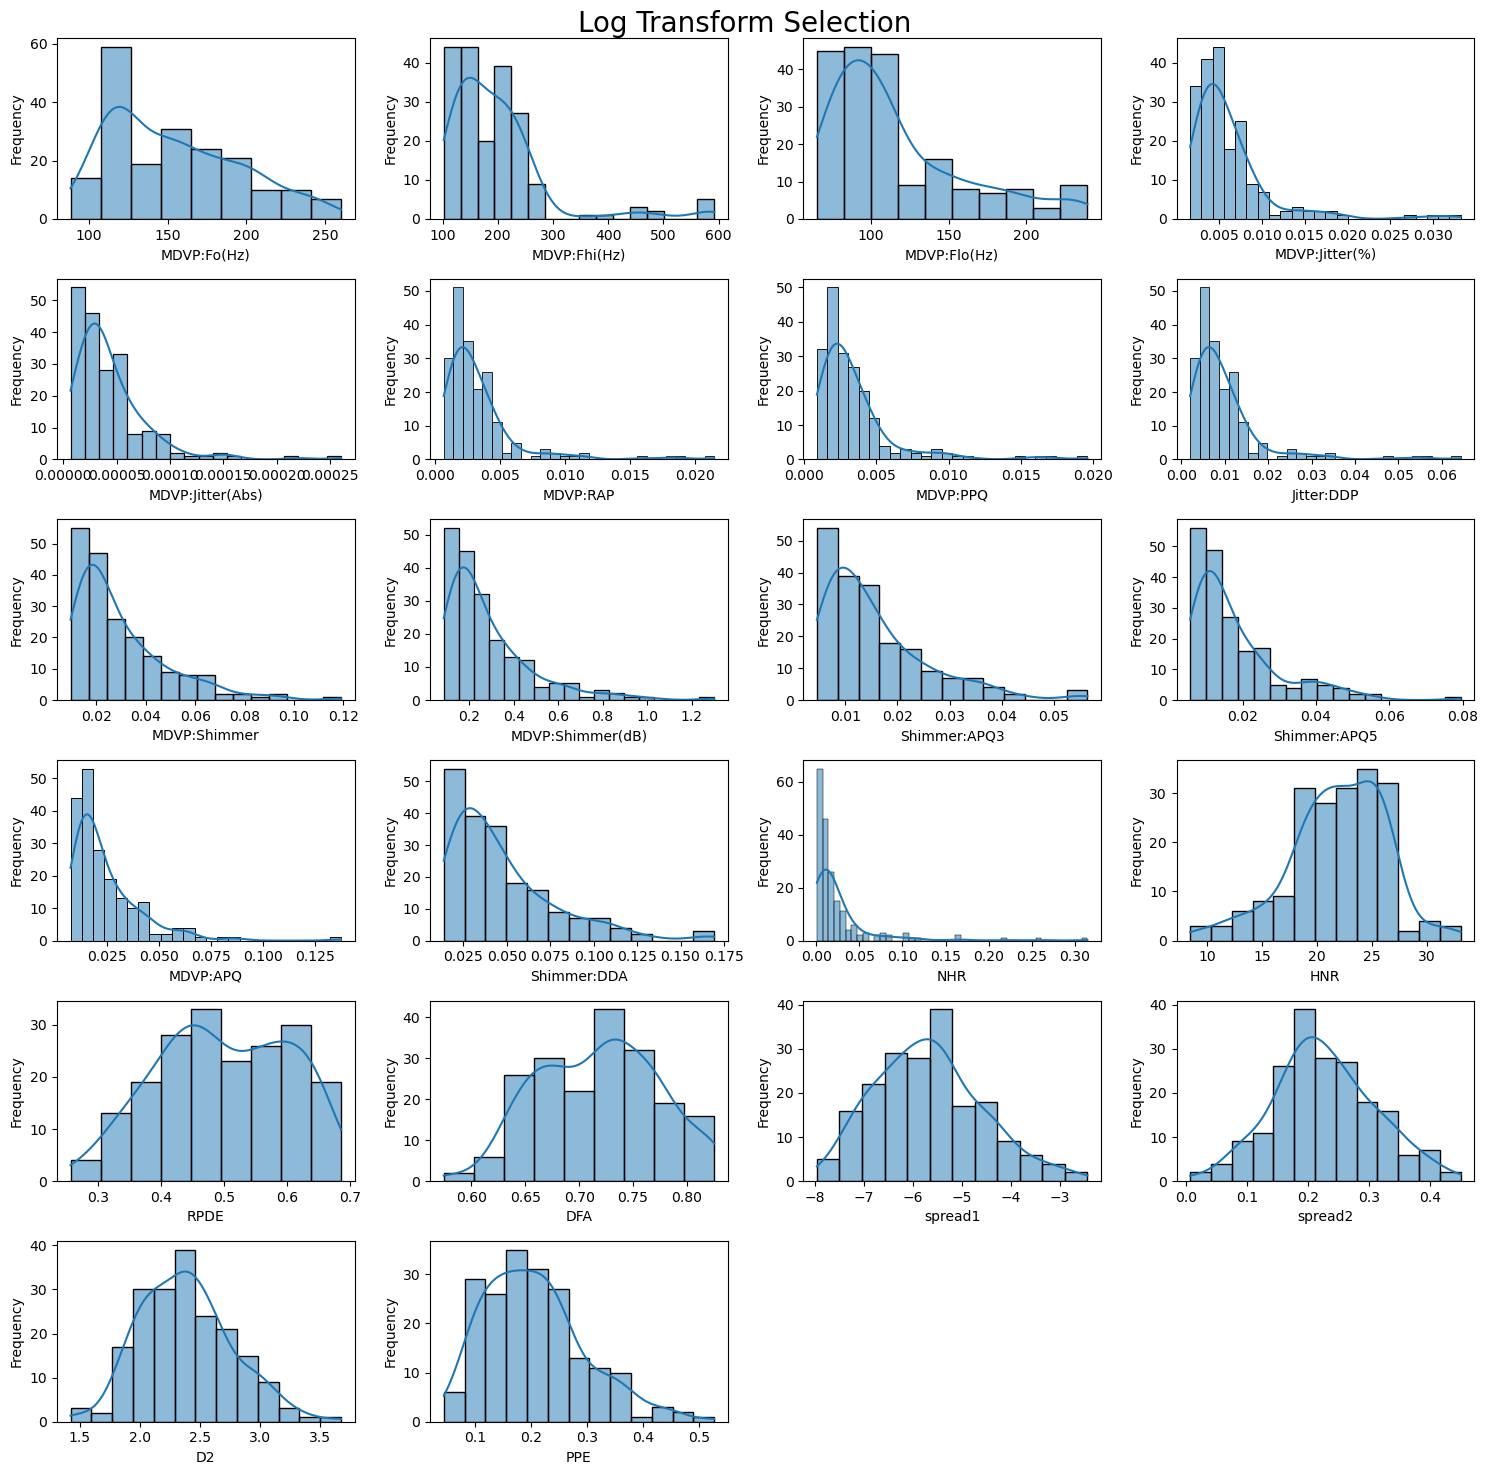

In [116]:
plt.figure(figsize=(15, 15))

# Get the number of columns in the DataFrame
num_features = len(df_logt.columns)

# Define rows and columns for subplots to fit 22 features
rows = (num_features // 4) + 1  # To fit 4 columns per row and add extra row if needed
columns = 4

for index, col in enumerate(df_logt.columns, start=1):
    plt.subplot(rows, columns, index)
    sns.histplot(data=df_logt, x=col, kde=True)
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')

plt.suptitle('Log Transform Selection', fontsize=20)
plt.tight_layout()
plt.show()


In [117]:
# Applying log transformation to the suggested columns
columns_to_log_transform = [
    'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
    'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
    'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA',
    'NHR', 'RPDE', 'PPE'
]

for col in columns_to_log_transform:
    df_logt[col] = np.log1p(df_logt[col])  # Using log1p to handle small values and avoid issues with zero


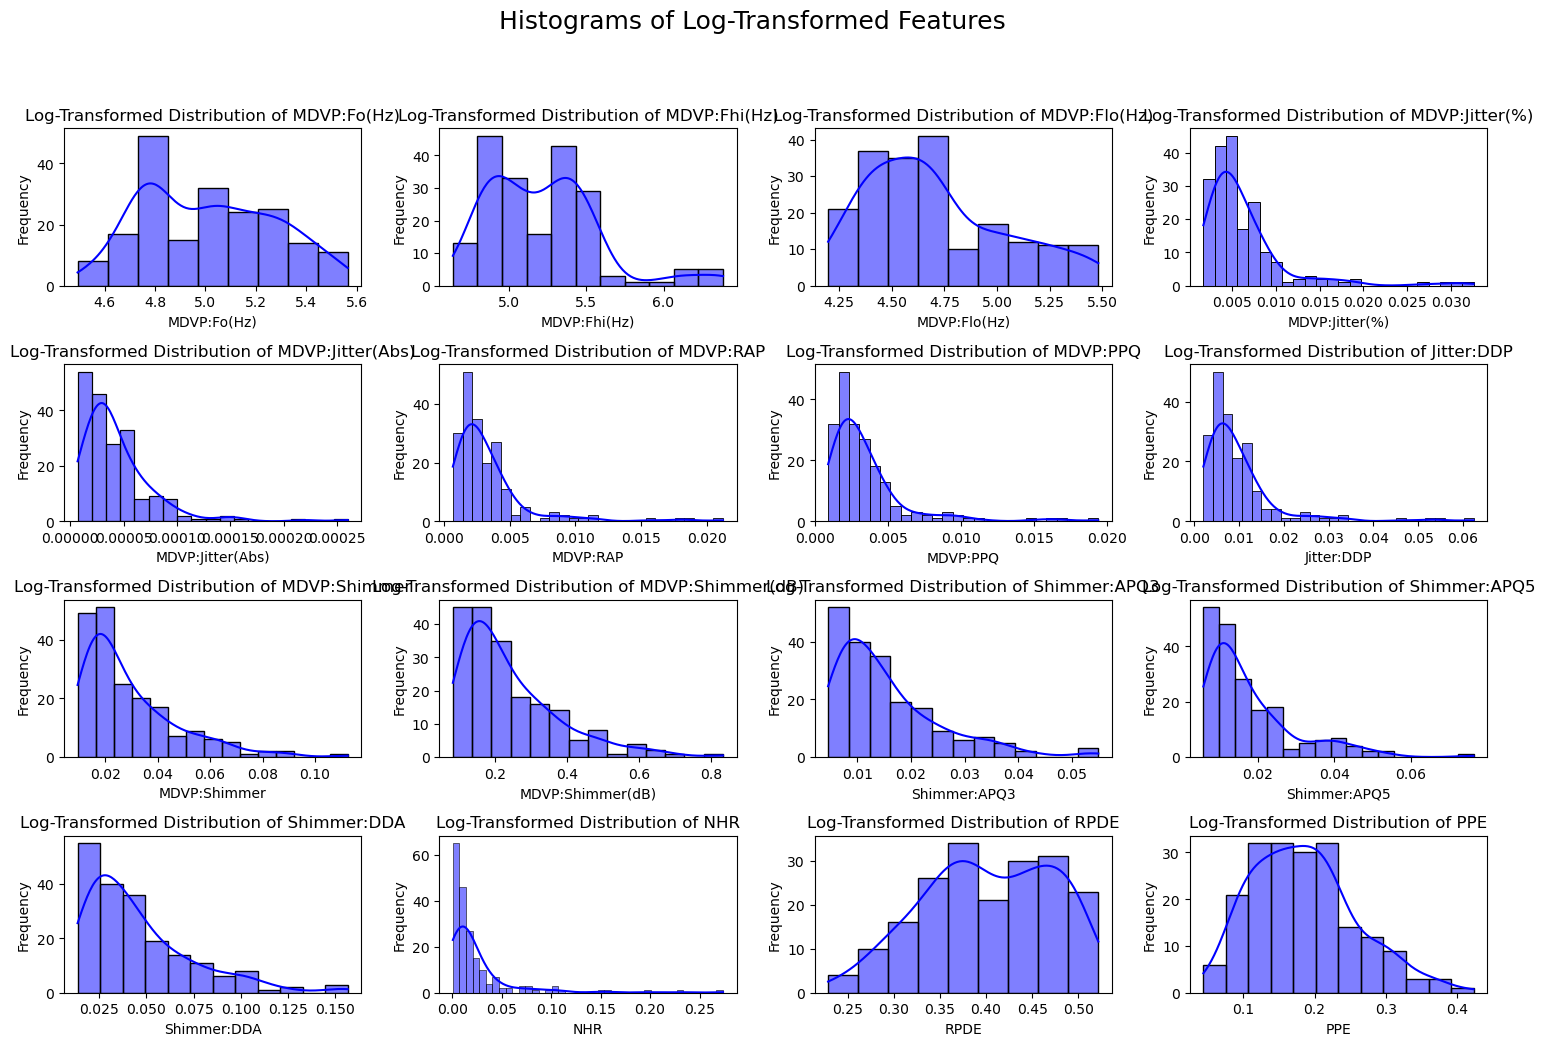

In [121]:
# Plot histograms of log-transformed features
plt.figure(figsize=(15, 15))  # Set figure size to accommodate multiple plots

num_features = len(df_logt.columns)

row = (num_features // 4) + 1
column = 4

# Loop through the columns and create subplots
for index, col in enumerate(columns_to_log_transform, start=1):
    plt.subplot(row, column, index)  # Create a grid of 4 rows by 4 columns
    sns.histplot(data=df_logt, x=col, kde=True, color='b')  # Plot histogram with KDE curve
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Log-Transformed Distribution of {col}')

plt.suptitle('Histograms of Log-Transformed Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title nicely
plt.show()
